<h1>Meeting the data</h1>

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
print(iris['DESCR'][:193] + '\n...')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [4]:
iris['target_names'] #types of iris

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [5]:
iris['feature_names'] #description of each feature

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(iris['data'].shape)
iris['data'][:10] #contains the measurement of each flower

(150, 4)


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [7]:
#an numpy array containing 0 to 2 values. Each one for a flower type. 0 for Setosa, 1 for Versicolor and 2 for Virginica
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state = 0)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


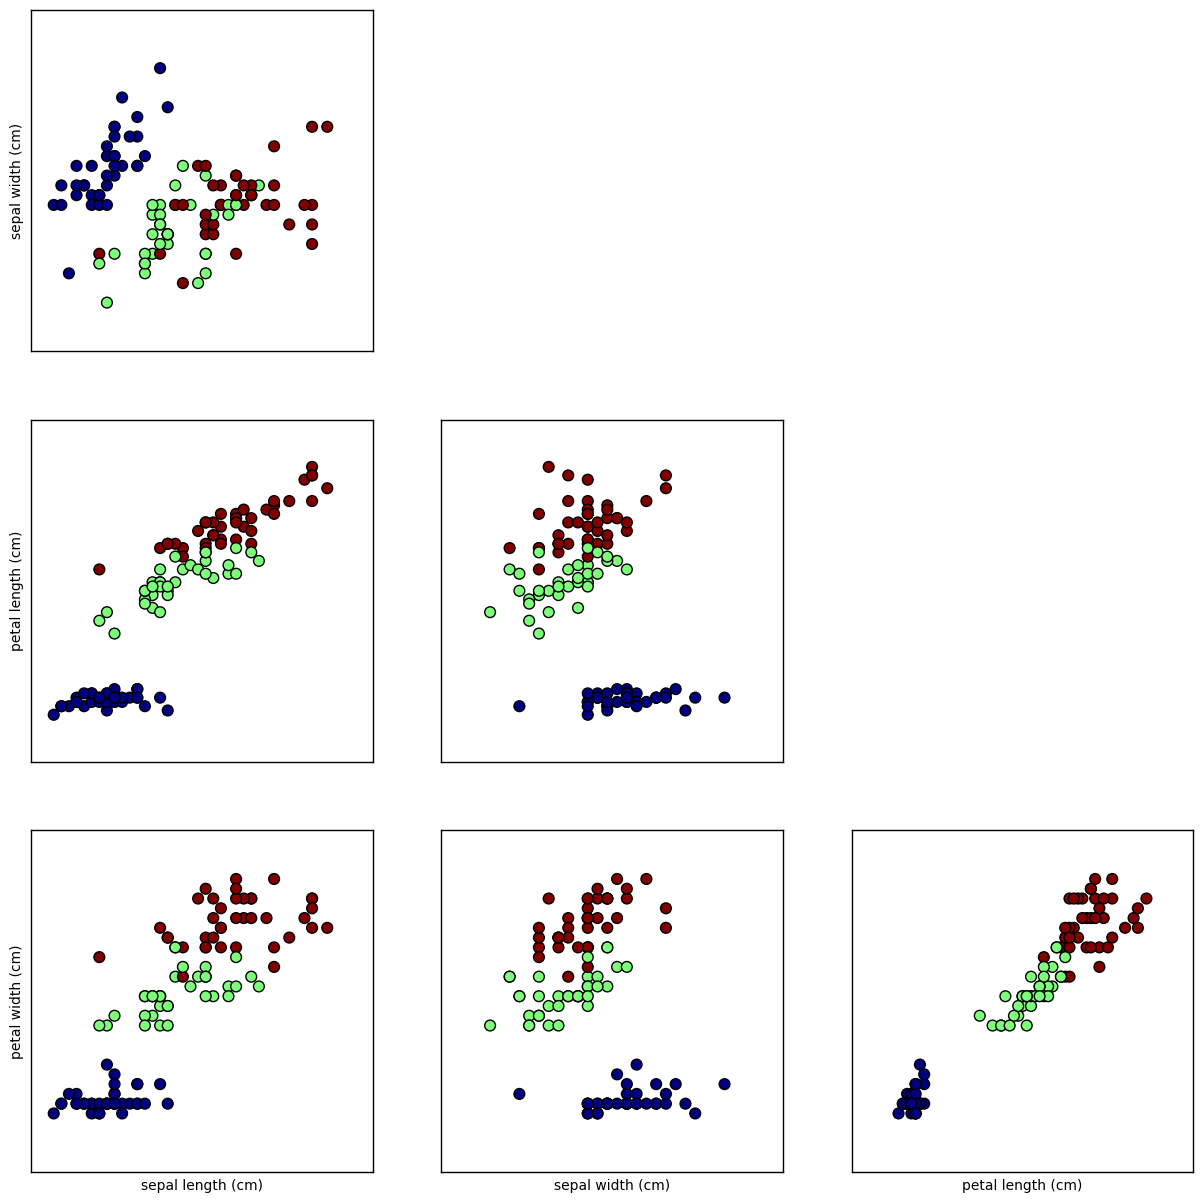

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j], X_train[:, i + 1], c=y_train, s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        
        if i == 2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i,j].set_visible(False)

In [10]:
#Creating the model
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
#testing model
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [12]:
prediction = knn.predict(X_new)
prediction

array([0])

In [13]:
iris['target_names'][prediction]

array(['setosa'], 
      dtype='<U10')

In [14]:
#Accuracy of the model
knn.score(X_test, y_test)

0.97368421052631582